# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("Temp_States.csv")



#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
print(type(temp["City"]))
print(type(temp["State"]))
print(type(temp["Temperature"]))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Select the rows where state is New York

In [5]:

temp_copy = temp.loc[temp["State"] == "New York"]

#### What is the average of the temperature of cities in New York?

In [6]:
temp_copy["Temperature"].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp.loc[temp["Temperature"] > 15]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp.loc[temp["Temperature"] < 15]

,City,State,Temperature
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
4,Bridgeport,Connecticut,14.444444


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
temp.loc[temp["Temperature"].between(15,20)]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
6,Newark,New Jersey,20.000000


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
print(temp.groupby("State").mean())
print(temp.groupby("State").std())

             Temperature
State                   
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
             Temperature
State                   
Connecticut     1.964186
New Jersey      1.571348
New York        8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# print(type(employee["Name"]))
# print(type(employee["Years"]))
# print(type(employee["Salary"]))

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

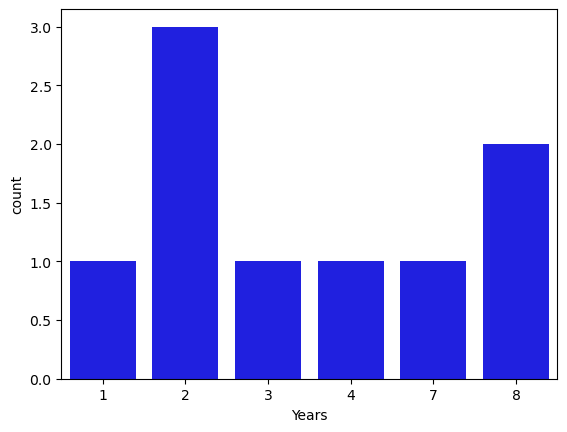

In [13]:
sns.countplot(x=employee["Years"], color='b');

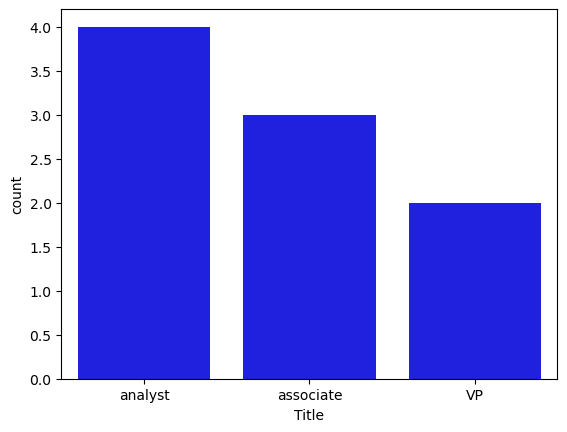

In [14]:
sns.countplot(x=employee["Title"], color='blue');

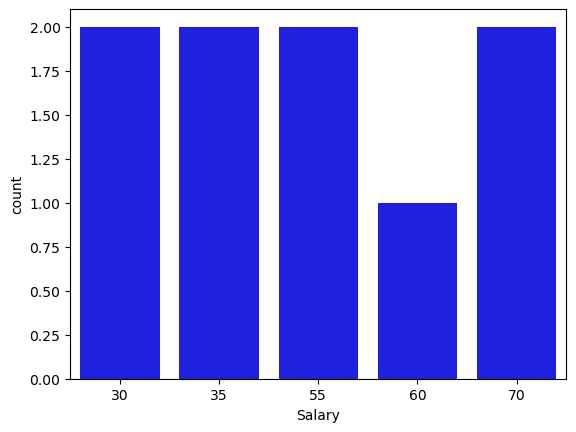

In [15]:
sns.countplot(x=employee["Salary"], color='blue');

#### What's the average salary in this company?

In [16]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [17]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [18]:
employee["Salary"].min()


30

#### Who are the employees with the lowest salary?

In [19]:

employee.sort_values(by=["Salary"]).head(4) 

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35


#### Could you give all the information about an employee called David?

In [20]:
employee.loc[employee['Name'] == "David"]


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [21]:
employee["Salary"].loc[employee['Name'] == "David"]


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [22]:
employee.loc[employee['Title'] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [23]:
employee.head(2)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


In [24]:
employee[:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [25]:
employee.loc[(employee['Title'] == "associate") & ~ (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [26]:
employee.groupby(["Years", "Name"]).mean()

Salary
Years Name          
1     Jose      35.0
2     David     30.0
      Eva       55.0
      Maria     30.0
3     Samuel    55.0
4     Sonia     35.0
7     Pedro     60.0
8     Ana       70.0
      Carlos    70.0

####  What is the average Salary per title?

In [27]:
employee.groupby(["Title"]).mean(["Salary"])

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

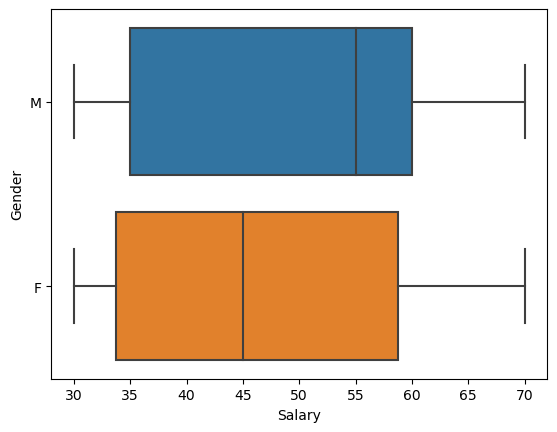

In [28]:
sns.boxplot(x=employee["Salary"], data=employee, y="Gender");

In [29]:
employee["Salary"].quantile(0.25)

35.0

In [30]:
employee["Salary"].quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [31]:
employee.groupby(["Gender"]).mean(["Salary"])

# Female average salary is lower

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [32]:
print(employee.groupby(["Department"]).mean(["Salary", "Years"]))
print(employee.groupby(["Department"]).min(["Salary", "Years"]))
print(employee.groupby(["Department"]).max(["Salary", "Years"]))

               Years  Salary
Department                  
HR          4.666667   45.00
IT          4.500000   48.75
Sales       2.500000   55.00
            Years  Salary
Department               
HR              2      30
IT              1      30
Sales           2      55
            Years  Salary
Department               
HR              8      70
IT              8      70
Sales           3      55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [33]:
employee.groupby(["Department"]).agg(["max", "min"])

Name         Education           Gender          Title  \
               max     min       max       min    max min        max   
Department                                                             
HR           Sonia     Ana    Master  Bachelor      M   F    analyst   
IT           Pedro  Carlos       Phd  Bachelor      M   F  associate   
Sales       Samuel     Eva    Master  Bachelor      M   F  associate   

                      Years     Salary      
                  min   max min    max min  
Department                                  
HR                 VP     8   2     70  30  
IT                 VP     8   1     70  30  
Sales       associate     3   2     55  55

In [34]:
employee.groupby(["Department"]).apply(lambda x:(x["Salary"].max()-x["Salary"].min()))

Department
HR       40
IT       40
Sales     0
dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [35]:
orders = pd.read_csv("Orders.zip")
orders.drop(["Unnamed: 0"], axis = 1, inplace=True)
orders.head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [36]:
# orders["InvoiceNo"].dtype
# orders["Description"].dtype
# orders["UnitPrice"].dtype
# orders["InvoiceDate"].dtype
# orders["amount_spent"].dtype

In [37]:
# your answer here

####  What is the average Purchase Price?

In [38]:
orders["amount_spent"].mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [39]:
orders["amount_spent"].max()

168469.6

In [40]:
orders["amount_spent"].min()

0.0

#### Select all the customers we have in Spain

In [41]:
orders.loc[orders["Country"] == "Spain"].head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [42]:
len(orders.loc[orders["Country"] == "Spain"].value_counts())

2480

#### Select all the customers who have bought more than 50 items ?

In [43]:
orders["CustomerID"].value_counts().loc[lambda x: x > 50].index

Int64Index([17841, 14911, 14096, 12748, 14606, 15311, 14646, 13089, 13263,
            14298,
            ...
            12514, 13354, 15829, 15579, 13708, 17383, 15192, 17646, 13336,
            15900],
           dtype='int64', length=1908)

#### Select orders from Spain that are above 50 items

In [44]:
orders2 = orders.loc[orders["Country"] == "Spain"]
orders2.loc[orders["Quantity"] > 50].head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [45]:
orders.loc[orders["amount_spent"] == 0].head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [46]:
orders.loc[orders["Description"].str.contains('lunch bag')].head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [47]:
orders.loc[(orders["Description"].str.contains('lunch bag') & (orders['year'] == 2011))]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

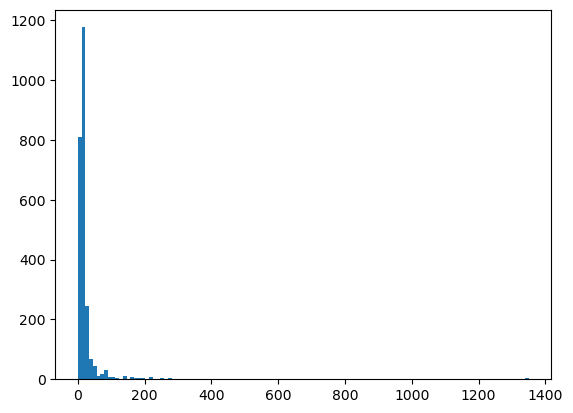

In [48]:
plot = plt.hist(orders2["amount_spent"], bins=120)

#### Select all orders made in the month of August

In [49]:
orders.loc[orders["month"] == 8]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [50]:
orders.loc[orders["month"] == 8].value_counts("Country").head()

Country
United Kingdom    23105
Germany             795
EIRE                593
France              569
Netherlands         280
dtype: int64

#### What's the  average amount of money spent by country

In [51]:
orders.groupby("Country")["amount_spent"].mean().head()

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [52]:
orders[orders["UnitPrice"] == max(orders["UnitPrice"])]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [53]:
orders.groupby("month")["amount_spent"].mean()

month
1     26.820132
2     22.437643
3     21.911939
4     20.720737
5     23.959980
6     24.322740
7     22.368920
8     23.890123
9     23.803107
10    20.972189
11    18.000114
12    25.099086
Name: amount_spent, dtype: float64